In [10]:
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

Automatically created module for IPython interactive environment


In [2]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

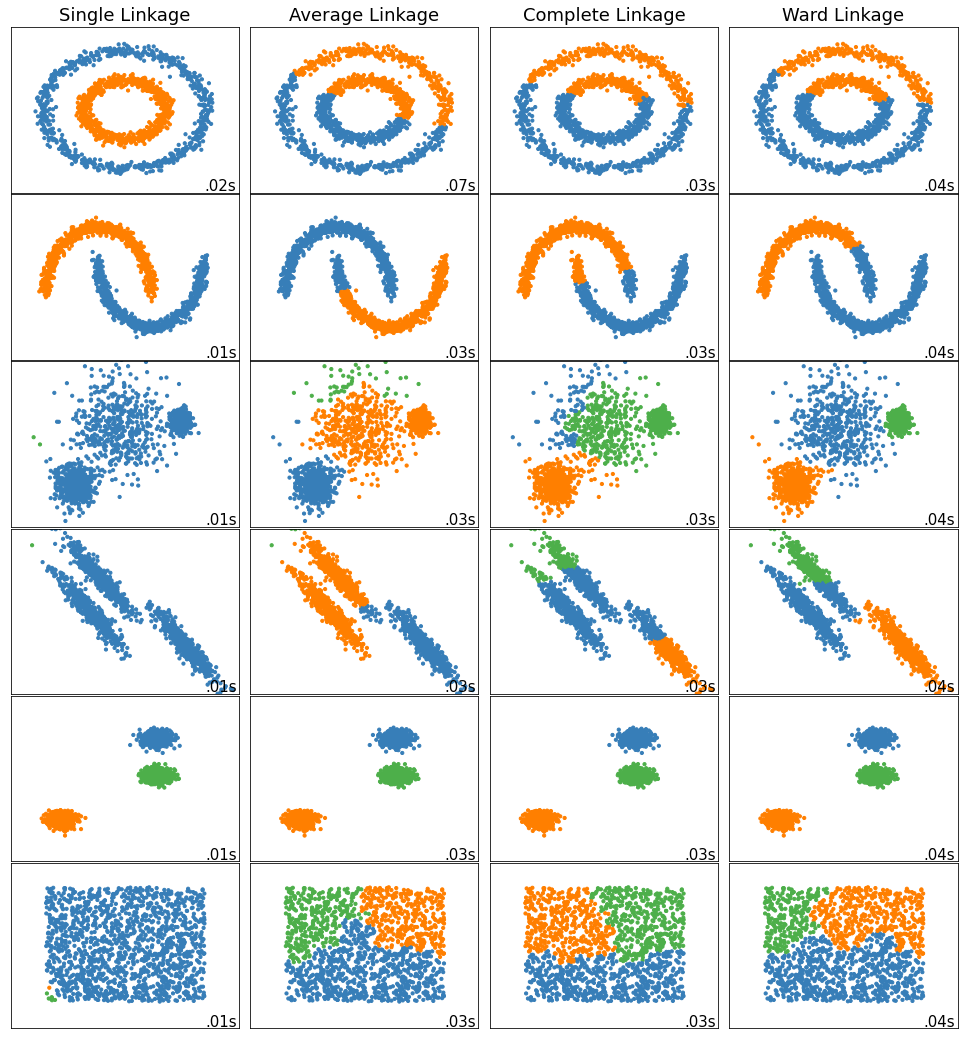

In [6]:
# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5), facecolor="White")
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {'n_neighbors': 2}),
    (aniso, {'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward')
    complete = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='complete')
    average = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='average')
    single = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='single')

    clustering_algorithms = (
        ('Single Linkage', single),
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

# Agora quero fazer isso para a iris

In [26]:


n_samples = 1500

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

print(list(iris.target_names))
print()
print(iris.data.shape)
print("\n\n")

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
print(len(noisy_circles[0]))
# noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
# blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
# no_structure = np.random.rand(n_samples, 2), None

# # Anisotropicly distributed data
# random_state = 170
# X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
# transformation = [[0.6, -0.6], [-0.4, 0.8]]
# X_aniso = np.dot(X, transformation)
# aniso = (X_aniso, y)

# # blobs with varied variances
# varied = datasets.make_blobs(n_samples=n_samples,
#                              cluster_std=[1.0, 2.5, 0.5],
#                              random_state=random_state)

['setosa', 'versicolor', 'virginica']

(150, 4)



1500


In [5]:
# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5), facecolor="White")
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (data, {'n_clusters':2})
#     (noisy_circles, {'n_clusters': 2}),
#     (noisy_moons, {'n_clusters': 2}),
#     (varied, {'n_neighbors': 2}),
#     (aniso, {'n_neighbors': 2}),
#     (blobs, {}),
#     (no_structure, {})
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward')
    complete = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='complete')
    average = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='average')
    single = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='single')

    clustering_algorithms = (
        ('Single Linkage', single),
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

ValueError: too many values to unpack (expected 2)

<Figure size 986.4x1044 with 0 Axes>

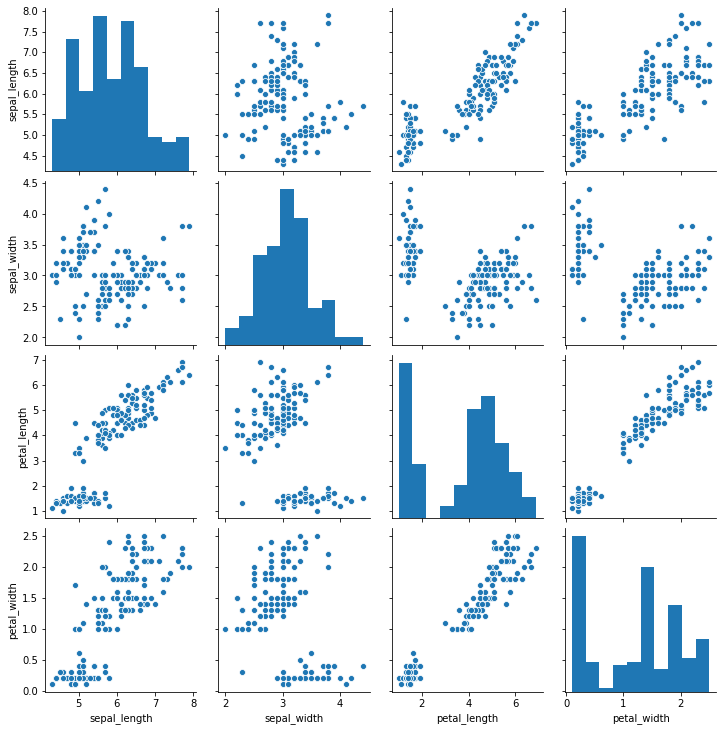

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

iris_data = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
iris_data.drop(['species'], axis=1, inplace = True)
import seaborn as sns
sns.pairplot(iris_data) 

In [14]:
print(iris_data.sepal_length.shape)
from scipy.cluster import hierarchy
A = np.random.rand(150, 4)
Z = hierarchy.dendrogram(A, 'single')
# Z = hierarchy.dendrogram(iris_data.sepal_length, 'single')
plt.figure()
hierarchy.dendrogram(A)


0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64


TypeError: The second argument must be a number

# Isso faz alguma coisa mais a condição de termos binomiais é chata

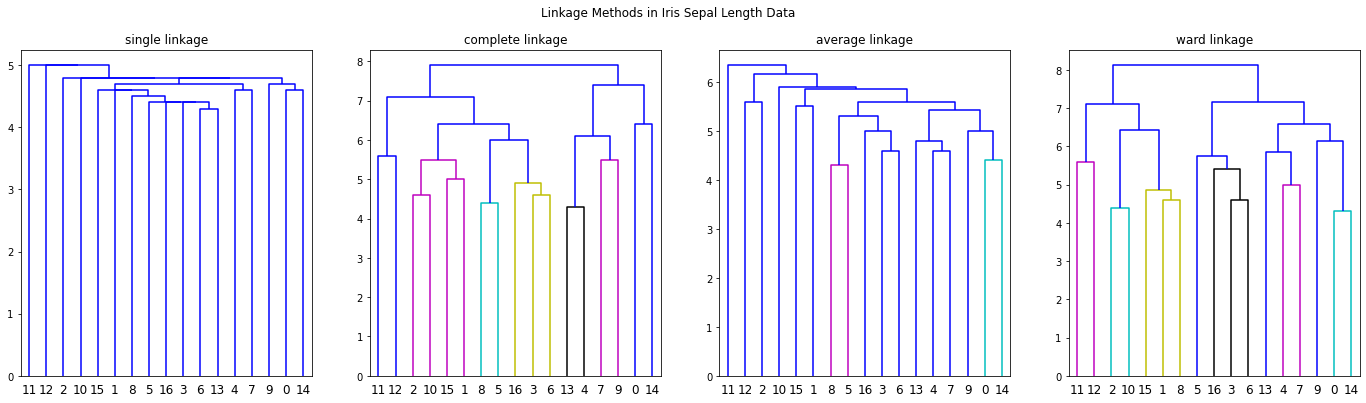

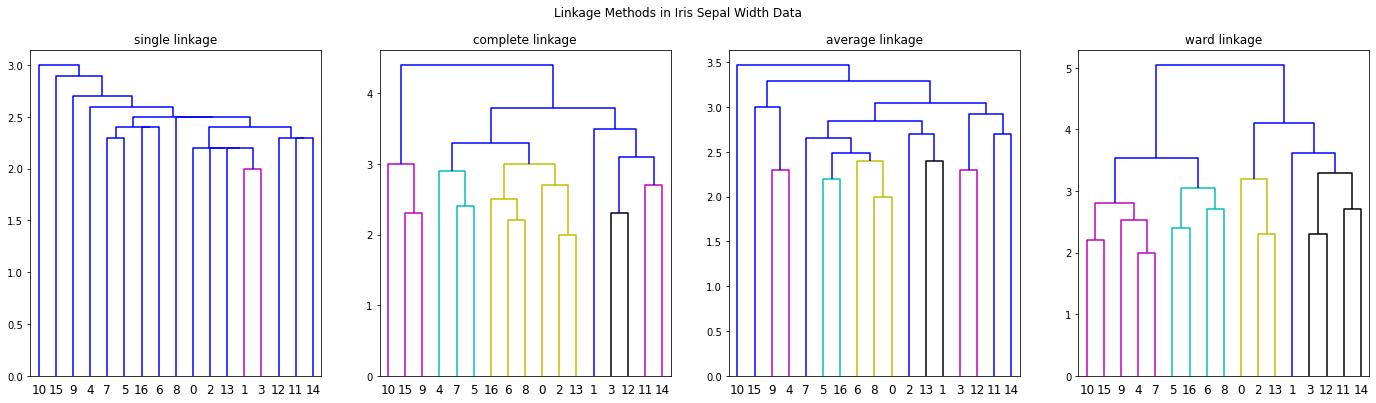

In [104]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

ytdist = np.array(iris_data.sepal_length[:136])

#plot config
fig, ax = plt.subplots(1, 4, figsize=(6*4, 6), sharex=True)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])


i = 0
plt.suptitle("Linkage Methods in Iris Sepal Length Data")
for method in ['single', 'complete', 'average', 'ward']:
    Z = hierarchy.linkage(ytdist, method) # len must be a binomial coef (136 and 153 are closest values)
    dn = hierarchy.dendrogram(Z, ax=ax[i])
    ax[i].set_title(method+" linkage")
    i+=1
    
hierarchy.set_link_color_palette(None)  # reset to default after use
# plt.show()








ytdist = np.array(iris_data.sepal_width[:136])

#plot config
fig, ax = plt.subplots(1, 4, figsize=(6*4, 6), sharex=True)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])


i = 0
plt.suptitle("Linkage Methods in Iris Sepal Width Data")
for method in ['single', 'complete', 'average', 'ward']:
    Z = hierarchy.linkage(ytdist, method) # len must be a binomial coef (136 and 153 are closest values)
    dn = hierarchy.dendrogram(Z, ax=ax[i])
    ax[i].set_title(method+" linkage")
    i+=1
    
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.show()


# dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y',orientation='top')

# Isso funciona melhor

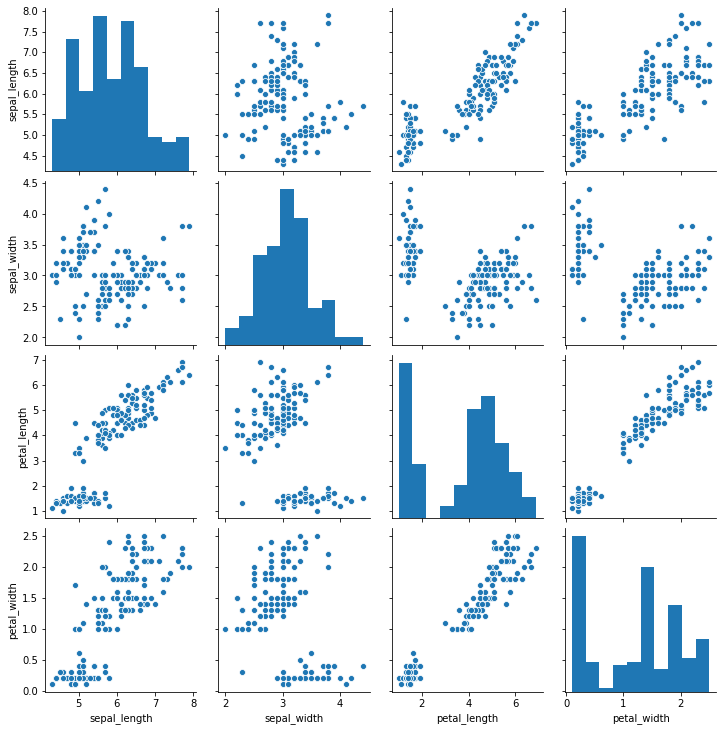

In [105]:
"https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

iris_data = pd.read_csv("iris.cvs")
iris_data.drop(['species'], axis=1, inplace = True)
sns.pairplot(iris_data) 

(150, 4)
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
(150, 2)
(150, 2)


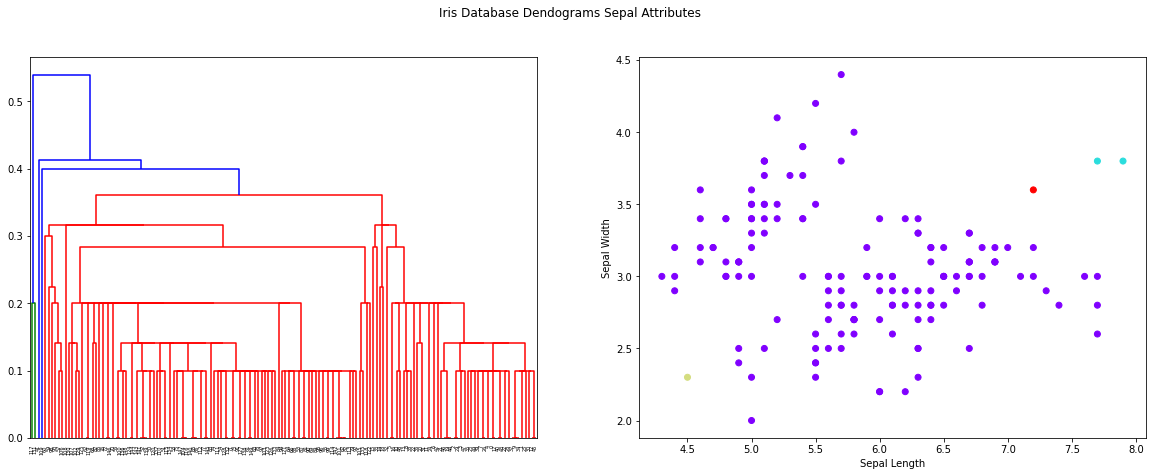

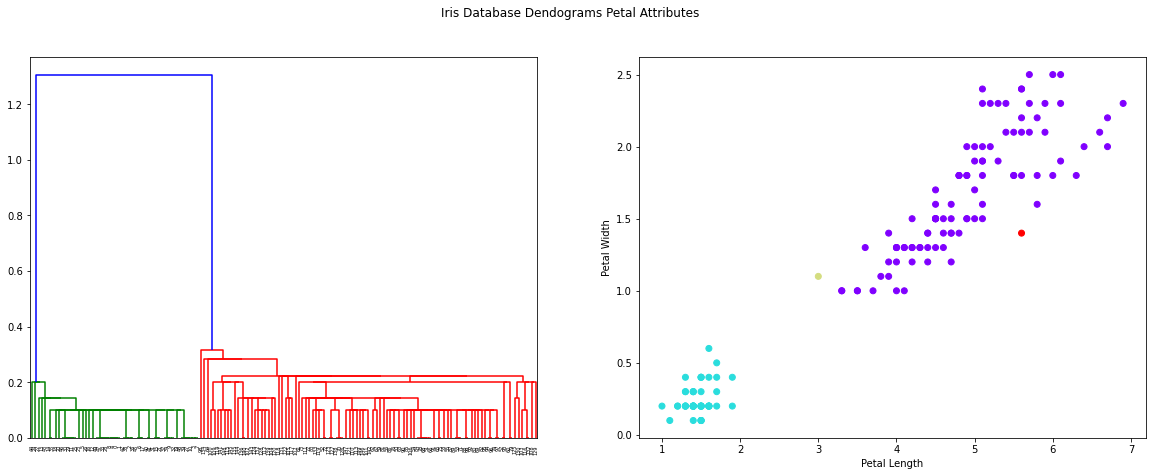

In [139]:
print(iris_data.shape)
print(iris_data.head())


data = iris_data.iloc[:, :2].values
print(data.shape)
# print(data)


import scipy.cluster.hierarchy as shc

fig, ax = plt.subplots(1, 2, figsize=(10*2, 7), sharex=False)
fig.suptitle("Iris Database Dendograms Sepal Attributes")
dend = shc.dendrogram(shc.linkage(data, method='single'), ax=ax[0])


from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
cluster.fit_predict(data)
ax[1].scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
ax[1].set_xlabel("Sepal Length")
ax[1].set_ylabel("Sepal Width")

data = iris_data.iloc[:, 2:4].values
print(data.shape)

fig, ax = plt.subplots(1, 2, figsize=(10*2, 7), sharex=False)
fig.suptitle("Iris Database Dendograms Petal Attributes")
dend = shc.dendrogram(shc.linkage(data, method='single'), ax=ax[0])

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
cluster.fit_predict(data)
ax[1].scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
ax[1].set_xlabel("Petal Length")
ax[1].set_ylabel("Petal Width")

plt.show()